# Image Processing

In this part,  we will learn how to do basic image processing using Python and the scientific packages openCV, Numpy, scikit-image, Matplotlib and Pandas.
## Some popular image processing libraries in python include:
- OpenCV
- scikit-image
- PIL
- and more\
We just tried scikit-image, Let's use OpenCV this time.

### Step 1: Set up the environment
import the necessary libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
# We are using the warning library to avoid getting a warning, it is not a big deal.
import warnings
warnings.filterwarnings("ignore")

### Step 2: Update an image
To upload an image in Google Colab, you can follow these steps:

1. Mount Google Drive (Optional but recommended): If your image is stored in Google Drive and you want to access it from Colab, you can mount your Google Drive by running the following code cell: \

from google.colab import drive\
drive.mount('/content/drive')

2. You can upload an image directly to Colab:

from google.colab import files \
uploaded = files.upload()

This will prompt you to select a file from your local machine. Select the image file you want to upload.

After the upload is complete, you can access the uploaded image file.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dog.jpg to dog.jpg


Read the uploaded image file

In [ ]:
file_name = next(iter(uploaded))
image = cv2.imread(file_name)

In [ ]:
# OpenCV reads images in BGR format, convert it to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

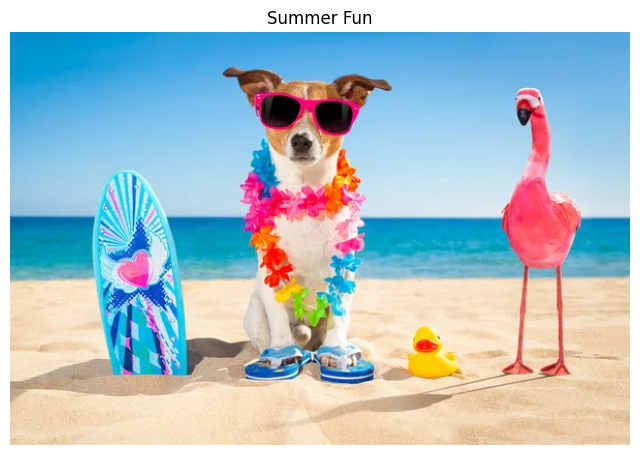

In [ ]:
# Display using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Summer Fun')
plt.show()

An RGB color is stored in a structure or unsigned integer with Blue occupying the least significant "area" (a byte in 32-bit and 24-bit formats), Green the second least, and Red the third least. BGR is the same, except the order of areas is reversed. Red occupies the least significant area, Green the second (still), and Blue the third.

### Step 3: Some basic image operations

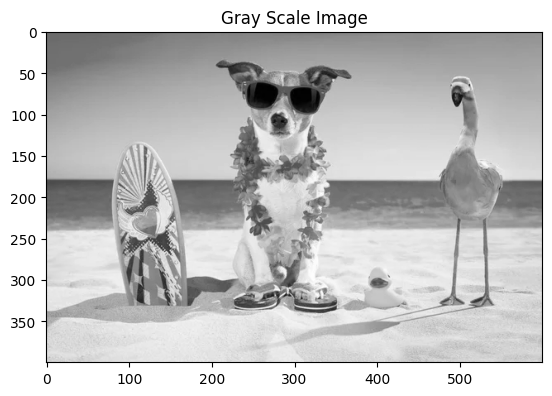

In [ ]:
### Covert to grayscale
flag= cv2.IMREAD_GRAYSCALE
image_gray= cv2.imread(file_name, flag)
cmap= "gray" # cmap should be "gray" for grayscale images
plt.imshow(image_gray, cmap= cmap), plt.title("Gray Scale Image");

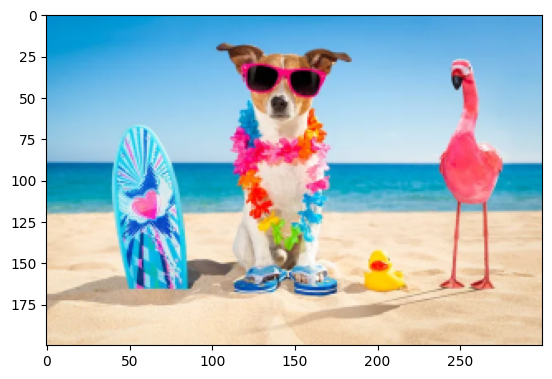

In [ ]:
### Resize an image to a new width and height
resized_image = cv2.resize(image, (300, 200))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

# Thresholding
* We use thresholding to convert images to binary, making it easier to manipulate images.
* We set a threshold and pixels below this threshold will be 0 (black), pixels above this threshold will be 1 (white).
* The image should be grayscale to make a meaningful thresholding.

In [ ]:
thresh, image_binary= cv2.threshold(image_gray, thresh= 150, maxval= 255, type= cv2.THRESH_BINARY)

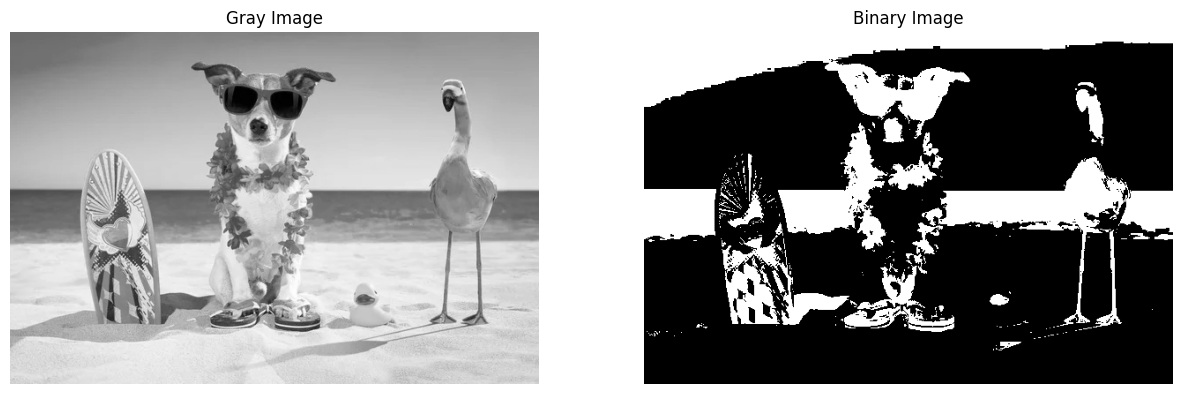

In [ ]:
plt.figure(figsize= (15,10))
plt.subplot(1,2,1), plt.imshow(image_gray, cmap= "gray"), plt.title("Gray Image"), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(image_binary, cmap= "binary"), plt.title("Binary Image"), plt.axis("off")
plt.show()

### Apply different filters to an image.

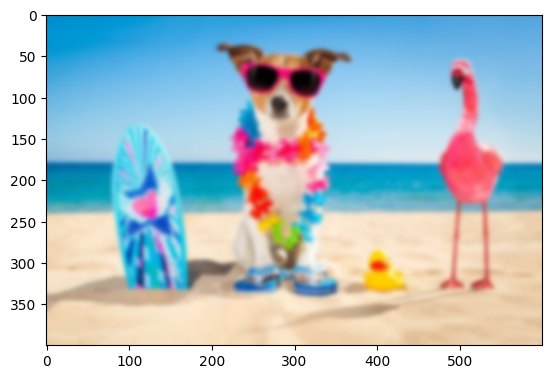

In [ ]:
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)
# Display the blurred image
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))

### Edge Detection

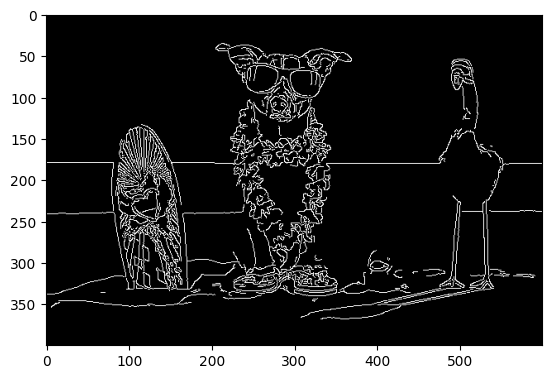

In [ ]:
# Edge detection using Canny
edges = cv2.Canny(image_gray, 100, 200)

# Display the edges
plt.imshow(edges, cmap='gray')

## Task
Let's have some fun!      
1. Convert a photo into a pencil sketch effect.
you need to find a pic or take a pic yourself, print the original pic, then call the function below and print the new pic.

2. (optional) Try out advanced techniques like object detection, image segmentation, or feature extraction. some functions you may find from [here](https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html).

In [ ]:
def photo_sketch(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Invert the grayscale image
    inverted_image = cv2.bitwise_not(gray_image)

    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)

    # Invert the blurred image
    inverted_blurred_image = cv2.bitwise_not(blurred_image)

    # Create the pencil sketch
    sketch_image = cv2.divide(gray_image, inverted_blurred_image, scale=256.0)

    # Convert the sketch image to RGB for displaying with matplotlib
    sketch_image_rgb = cv2.cvtColor(sketch_image, cv2.COLOR_GRAY2RGB)

    return sketch_image_rgb